In [1]:
import perms
import math
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

all_methods = [perms.indexed_unoptimized,
               perms.indexed_optimized,
               perms.built_in_optimized,
               perms.built_in_unoptimized,
               perms.method1,
               perms.method2,
               perms.method3,
               perms.method4]

for method in all_methods:
    perms.assert_permutations(method)

indexed_unoptimized  correctly implemented!
indexed_optimized    correctly implemented!
built_in_optimized   correctly implemented!
built_in_unoptimized correctly implemented!
method1              correctly implemented!
method2              correctly implemented!
method3              correctly implemented!
method4              correctly implemented!


# Timing the different permutation building implementations

In [2]:
# Timing setup
t = 10
timings = defaultdict(list)
sizes = [i for i in range(2,t+1)]

# Timing
for size in sizes:
    print(f'\033[1mBuilding permutations of size: {size}\033[0m')
    for method in all_methods:
        method_name = str(method.__name__).replace("_", " ")
        print(f'\033[4m{method_name}\033[0m')
        time = %timeit -o method(size)
        timings[method_name].append(time.average)
    print('\n')

Building permutations of size: 2
indexed unoptimized
4.87 µs ± 595 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
indexed optimized
3.08 µs ± 105 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
built in optimized
1.02 µs ± 6.64 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
built in unoptimized
6.7 µs ± 25.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
method1
2.27 µs ± 193 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
method2
1.49 µs ± 9.68 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
method3
3.82 µs ± 8.62 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
method4
2.52 µs ± 4.37 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Building permutations of size: 3
indexed unoptimized
13.8 µs ± 16.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
indexed optimized
8.88 µs ± 22.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
built in optimized
1.19 µs ± 1.09 n

In [3]:
def plot_compute_time(timings, extrapolate = False, save_fig = False):
    timing_dic = copy.deepcopy(timings)
    t = len(list(timing_dic.values())[0]) + 1 # started at 2
    sizes = list(range(2, t + 1))
    if extrapolate:
        assert extrapolate > t, f'extrapolate must be larger than the size of the values of timings'
        
        # Extrapolation timing
        ext_sizes = [i for i in range(t+1,extrapolate+1)]
        for method, time_array in timing_dic.items():
            base = time_array[-1] / math.factorial(t)
            timing_dic[method] += [base * math.factorial(size) for size in ext_sizes]
        
        sizes += list(range(t+1, extrapolate+1))
        
    plt.rcParams.update({'font.size': 22})
    fig = plt.figure(1, figsize=(15,8))
    ax = plt.subplot(111)

    for func in timings:
        ax.plot(sizes, 
                [time for time in timing_dic[func]], 
                label=func)  
    del timing_dic

    ax.set_yscale('log')
    ax.set_ylabel('compute time [seconds]')
    ax.set_xlabel('n')
    ax.set_xticks(sizes)
    ax.grid(which='both')
    ax.legend()
    ymin, ymax = ax.get_ylim()
    if extrapolate: 
        plt.vlines(t, ymin, ymax) # plot lane after which it is extrapolated
    if save_fig:
        assert save_fig.endswith('.png'), 'save_fig must be a string ending with .png'
        plt.savefig(save_fig)
    plt.show()

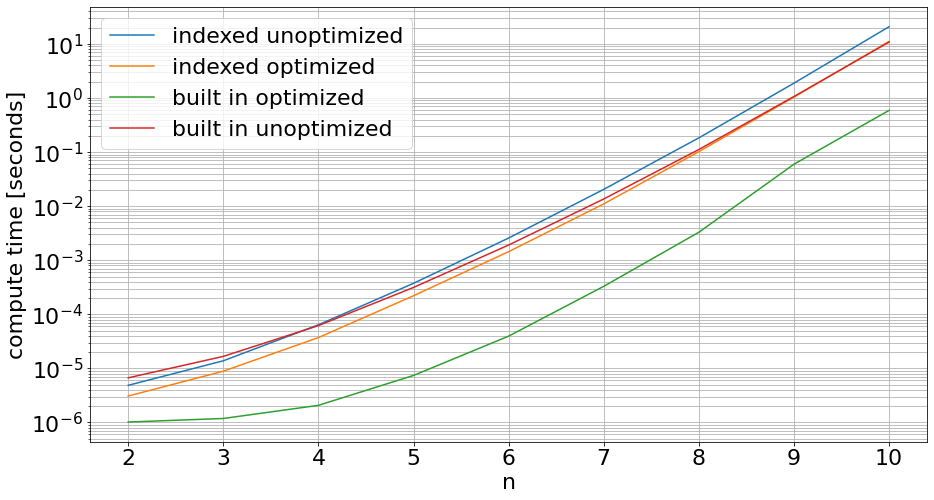

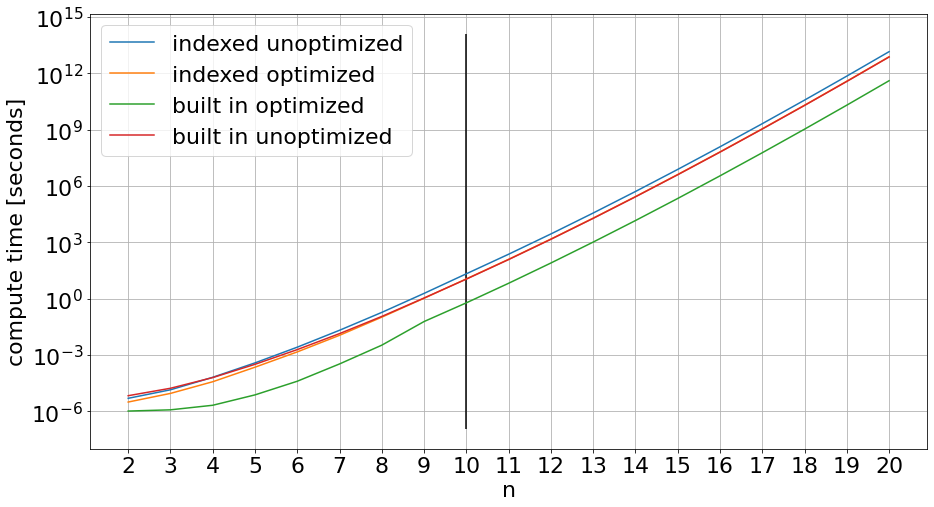

In [4]:
speficic_methods = ['indexed unoptimized',
                    'indexed optimized',
                    'built in optimized',
                    'built in unoptimized']

speficic_timings = {key : val for key, val in timings.items() if key in speficic_methods}

plot_compute_time(speficic_timings, False)
plot_compute_time(speficic_timings, 20)

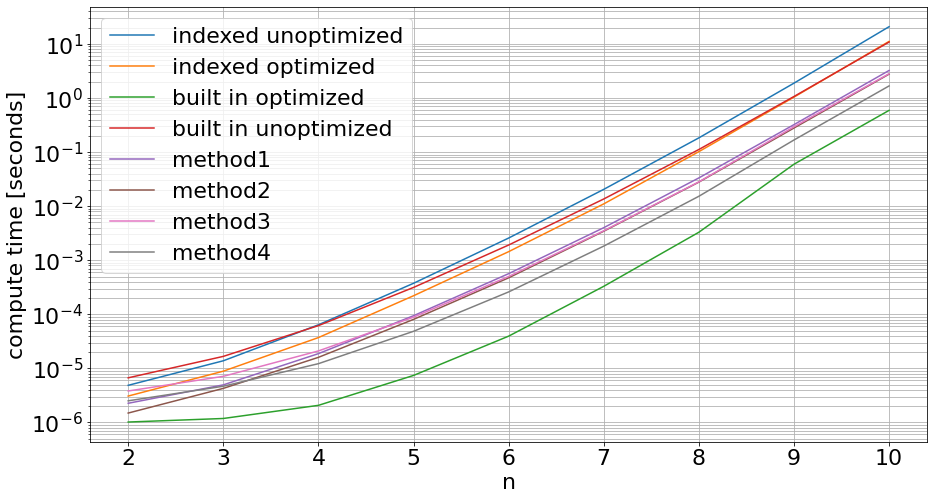

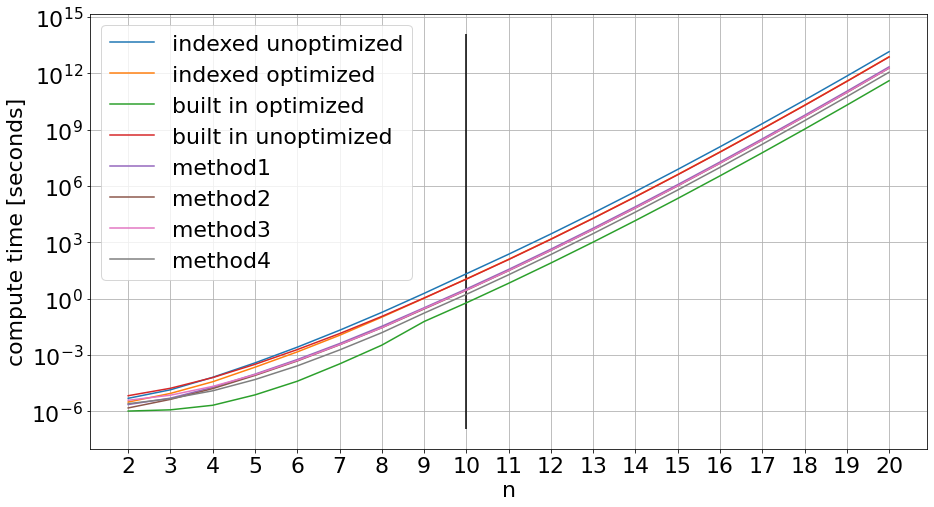

In [5]:
plot_compute_time(timings, False)
plot_compute_time(timings, 20)

# Check sample step influence

In [6]:
def get_relative_count_differences(step_size, n = 10):
    res = []
    for k in range(0, math.factorial(n), step_size):
        res.append(perms.permutation_by_index(n, k))
    arr = np.array(res)
    counters = []
    for i in range(arr.shape[1]):
        counters.append(Counter(arr[:,i]))
    df = pd.DataFrame(counters)
    return sum(df.max() / df.sum() - df.min() / df.sum()) * 100 / n # diff in percentage per element

def is_prime(n):
    if n <= 1:
        return False
    if n % 2 == 0 and n > 2: 
        return False
    return all(n % i for i in range(3, int(n**.5) + 1, 2))

In [7]:
res = []
n_range = range(5,11)
k_range = range(1,41)
for n in n_range:
    res.append([get_relative_count_differences(k, n = n) for k in k_range])
    
df = pd.DataFrame(res)
log_df = np.log(df + 1)

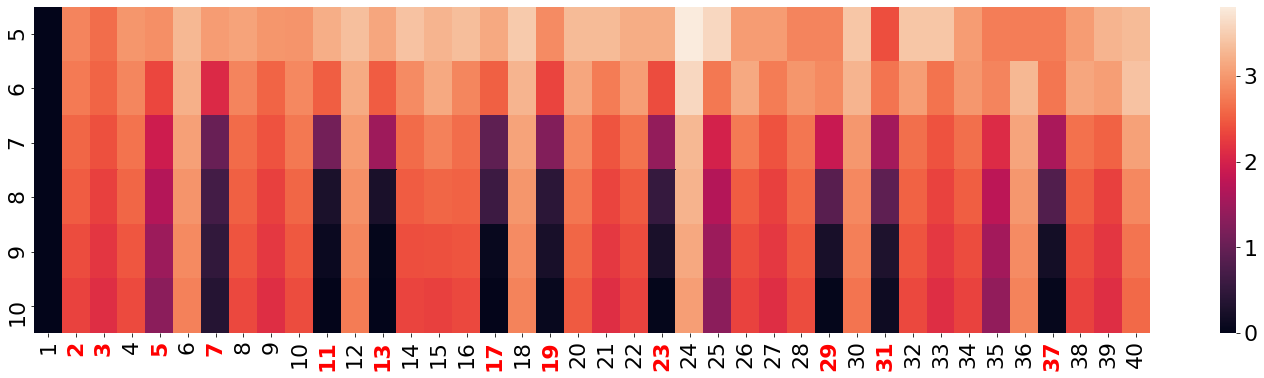

In [8]:
# set figure
fig, ax = plt.subplots(figsize=(25,6))

# create heatmap
sns.heatmap(log_df, ax=ax, xticklabels=k_range, yticklabels=n_range)

# mark the prime number for all k's
ax_len = len(ax.get_xticklabels())
for k, x_tick in zip(k_range, ax.get_xticklabels()):
    if is_prime(k):
        x_tick.set_color("red")
        x_tick.set_weight('bold')
        
plt.show()

In [23]:
df = pd.DataFrame(timings)
df = df[['indexed unoptimized', 'built in unoptimized', 'indexed optimized', 'built in optimized']][2:].round(6)

In [25]:
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  indexed unoptimized &  built in unoptimized &  indexed optimized &  built in optimized \\
\midrule
2 &             0.000064 &              0.000062 &           0.000037 &            0.000002 \\
3 &             0.000375 &              0.000314 &           0.000221 &            0.000007 \\
4 &             0.002574 &              0.001912 &           0.001441 &            0.000039 \\
5 &             0.020457 &              0.013578 &           0.011016 &            0.000330 \\
6 &             0.183151 &              0.111624 &           0.101881 &            0.003295 \\
7 &             1.881242 &              1.066261 &           1.038965 &            0.059659 \\
8 &            20.826496 &             10.826508 &          11.139895 &            0.591058 \\
\bottomrule
\end{tabular}

